# Check Environment
The path printed should contain the name of the environment you are using if the setup is correct.  

In [1]:
import sys
sys.executable

'/opt/anaconda3/envs/ktf-cv3/bin/python'

# Import Python Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
The **train.csv** and **test.csv** should be inside the folder **data** if you use the code below. Else, you can modify the path to the csv files accordingly.

In [3]:
PATH_TO_TRAIN = "data/train.csv"
PATH_TO_TEST = "data/test.csv"
train_df = pd.read_csv(PATH_TO_TRAIN)
test_df = pd.read_csv(PATH_TO_TEST)

In [4]:
train_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br/>
# Data Preparation
<br/>
## Separate Features and Labels from Train data

In [5]:
train_df_X = train_df.drop("label", axis=1)
train_df_y = train_df["label"]

## Convert df to np.array
Convert dataframe to numpy for training in Keras

In [6]:
X_train = train_df_X.values
y_train = train_df_y.values
X_test = test_df.values

<br/>
# Data Visualization
These step is for visualization of numbers only and is not needed for fitting in our Neural Network.  
We convert the **784** flattened pixels to **28 x 28** shaped pixels.

In [7]:
X_train_images = X_train.reshape(-1, 28, 28)

## Taking Random index
Everytime we execute the block of code below, random example is visualized along with it's label above it.

7


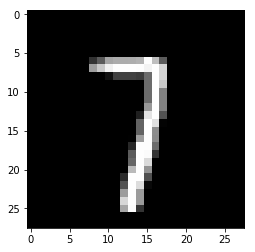

In [8]:
random_index = np.random.randint(0, len(y_train))
plt.imshow(X_train_images[random_index], cmap="gray")
print(y_train[random_index])

## Generating our own Random Image
We use 0-255 (the upper limit 256 is not inclusive i.e. numbers generated will be in between 0 and 255) and fill a 28 x 28 array randomly. Finally, we visualize the generated image.

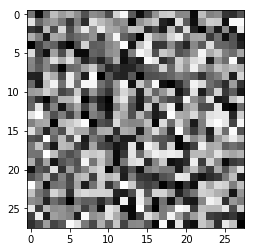

In [9]:
abc = np.random.randint(0, 256, (28, 28))
plt.imshow(abc, cmap="gray")

<br/>
# Importing keras module
* **SGD** is the Stochastic Gradient Descent which is an alternative version of the Gradient Descent in which an assumption is made that a sub-sample of follows, to some extent, the same distribution as the total population of examples. Hence, we optimize the loss using this sub-sample taking small steps at a time towards the minima.  
* **np_utils** is used to *One Hot Encode* our labels.

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils

/opt/anaconda3/envs/ktf-cv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Defining our Model

In [11]:
def create_model():
    m = Sequential()
    m.add(Dense(16, input_dim=784, activation="relu"))
    m.add(Dense(16, activation="relu"))
    m.add(Dense(10, activation="softmax"))
    
    return m

In [12]:
model = create_model()

## Summary of our model
This shows details of the number of trainable and non-trainable parameters.

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Model Compilation
This step involves the following:
1. Defining the loss function that we will use to calculate the loss and will try to minimize this per epoch.
2. Defining our optimizer which in this case is the Stochastic Gradient Descent (SGD)
3. Defining our learning rate which in this case is 0.001.
4. Adding a metrics that we want to calculate along with the loss to get a better idea which in our case is the accuracy.

In [14]:
model.compile(loss="mse", optimizer=SGD(lr=0.001), metrics=["acc"])

## One hot encoding our Labels

In [15]:
y_1h = np_utils.to_categorical(y_train)

In [16]:
y_1h.shape

(42000, 10)

## Finally fitting our Features and Labels
*Try defining the epochs and batch_size yourself.*

In [ ]:
# TODO : Define the Number of Epochs and the Batch Size.
EPOCHS = 
BATCH_SIZE = 

In [ ]:
history = model.fit(X_train, y_1h, epochs=EPOCHS, batch_size=BATCH_SIZE)

<br/>
# Function to visualize loss

In [17]:
def visualize_loss(h):
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

In [ ]:
visualize_loss(history)

<br/>
# Making our Predictions

In [ ]:
predictions = model.predict(X_test)

## Visualizing our Predictions

In [19]:
test_X_image = X_test.reshape(-1, 28, 28)

In [ ]:
random_index = np.random.randint(0, len(X_test))
print("Index :", random_index)
for i in np.arange(10):
    print("The probability that the image is {} = {:.3f}".format(i, predictions[random_index][i]))
plt.imshow(test_X_image[random_index], cmap="gray")

<br/>
# Further Explorations
1. Try various Optimizers other than SGD such as Adam, RMSprop, etc.
2. Try changing number of Epochs
3. Try changing the Batch Size
4. Try changing the Learning Rate
5. Try normalizing our input (Dividing each pixel by 255)
6. Try changing the Model architecture (Increasing/Decreasing Number of Nodes, Number of Layers, etc)
7. Try changing the Loss function (MSE, MAE, RMSE, etc)
8. Try *Data Augmentation*